In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
companies = pd.read_csv("./data/1000_Companies.csv")
X = companies.iloc[:, :-1].values
y = companies.iloc[:,4].values

In [24]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

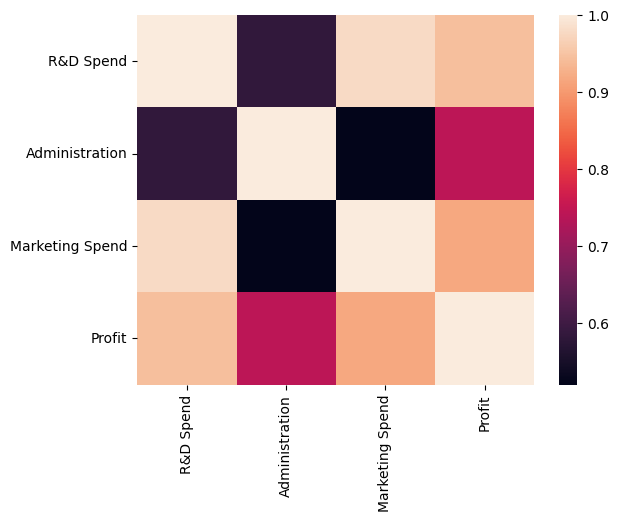

In [25]:
sns.heatmap(companies.corr(numeric_only=True))

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [
    ('encoder',OneHotEncoder(), [3])
],remainder='passthrough')

X = ct.fit_transform(X)

In [27]:
X = X[:,1:]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.2293644 ,  91473.37719687,
       164597.05380606,  53222.82667402,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.9105306 ,  75316.28143052,
       118248.14406603, 164574.40699901, 170937.28981069, 182069.11645083,
       118845.03252689,  85669.95112229, 180992.59396142,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346906, 210040.00765882, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649623,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130746, 174644.26529204, 117671.49128195,
        96731.37857434, 165452.25779408, 107724.34331255,  50194.54176914,
       116513.89532179,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [31]:
print(regressor.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [32]:
print(regressor.intercept_)

-51035.22972401453


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268671